<a href="https://colab.research.google.com/github/SushantVij/NLP-CV-IOT-UCS657-/blob/main/102003759sushant_NLP_in_Python_4_(Sentiment_Analysis)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
s1e1,"Yo, I am so psychedfor Invisible Force 2.Pleas...",s1e1
s1e2,"So, you're-you're not a Fed?Do you hear that?T...",s1e2
s1e3,"I'll take this.Merci.Sorry about all the...Oh,...",s1e3
s1e4,- Come on.- Mm-mm.- Just come with.- Nuh-uh.- ...,s1e4
s1e5,"Hey, baby.- Oh, Jesus Christ.- Yeah, I'm sorry...",s1e5
s1e6,"Obviously, a lot of it's temp.I love it.If we'...",s1e6
s1e7,"Ho, ho, ho! Merry Christmas!Who's been naughty...",s1e7
s1e8,"Howdy, boys.Oh, sorry.Sorry, sorry, sorry, sor...",s1e8


This code imports the TextBlob library and creates two functions, pol and sub. The pol function takes in a string (x) and returns the sentiment polarity of that string using the TextBlob library. The sub function takes in a string (x) and returns the sentiment subjectivity of that string using the TextBlob library. The code then applies those functions to the 'transcript' column of the data dataframe, creating two new columns called 'polarity' and 'subjectivity' which contain the sentiment polarity and subjectivity scores for each row in the dataframe. Finally, it prints out the dataframe with these new columns added.

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
 
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
s1e1,"Yo, I am so psychedfor Invisible Force 2.Pleas...",s1e1,0.039856,0.525477
s1e2,"So, you're-you're not a Fed?Do you hear that?T...",s1e2,-0.001659,0.534632
s1e3,"I'll take this.Merci.Sorry about all the...Oh,...",s1e3,0.108004,0.493125
s1e4,- Come on.- Mm-mm.- Just come with.- Nuh-uh.- ...,s1e4,0.050583,0.534539
s1e5,"Hey, baby.- Oh, Jesus Christ.- Yeah, I'm sorry...",s1e5,0.028129,0.580962
s1e6,"Obviously, a lot of it's temp.I love it.If we'...",s1e6,0.063884,0.506881
s1e7,"Ho, ho, ho! Merry Christmas!Who's been naughty...",s1e7,-0.002471,0.537024
s1e8,"Howdy, boys.Oh, sorry.Sorry, sorry, sorry, sor...",s1e8,-0.003158,0.570437


This code creates a scatter plot with the x-axis representing the polarity of the data, and the y-axis representing the subjectivity of the data. The size of the plot is set to 10 by 8. It then iterates through each comedian in the data and plots their polarity and subjectivity on the graph, labeling each point with their full name. The title, x-axis label, and y-axis label are also set. Finally, plt.show() displays the graph.



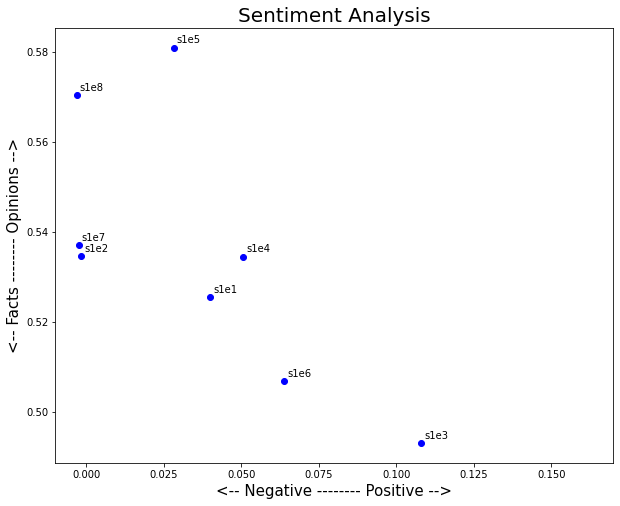

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .17) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

this code takes in a string of text and splits it into n equal parts. It first calculates the length of the text, the size of each chunk of text, and the starting points of each chunk of text. Then it pulls out equally sized pieces of text and puts it into a list which is returned.



In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
s1e1,"Yo, I am so psychedfor Invisible Force 2.Pleas...",s1e1,0.039856,0.525477
s1e2,"So, you're-you're not a Fed?Do you hear that?T...",s1e2,-0.001659,0.534632
s1e3,"I'll take this.Merci.Sorry about all the...Oh,...",s1e3,0.108004,0.493125
s1e4,- Come on.- Mm-mm.- Just come with.- Nuh-uh.- ...,s1e4,0.050583,0.534539
s1e5,"Hey, baby.- Oh, Jesus Christ.- Yeah, I'm sorry...",s1e5,0.028129,0.580962
s1e6,"Obviously, a lot of it's temp.I love it.If we'...",s1e6,0.063884,0.506881
s1e7,"Ho, ho, ho! Merry Christmas!Who's been naughty...",s1e7,-0.002471,0.537024
s1e8,"Howdy, boys.Oh, sorry.Sorry, sorry, sorry, sor...",s1e8,-0.003158,0.570437


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Yo, I am so psychedfor Invisible Force 2.Please.Invisible Force 1 was lame.I\'m all about Rising Tide.Rising Tide? The Deep?- Uh-huh.- Translucent could kick the Deep\'s ass.How? He\'s invisible.That\'s, like, all he\'s got.That\'s it.Exactly.He sneaks up on the Deep,and then boom, motherfucker!- Sit down.- Until the Deep makes a sharkbite Translucent\'s dick off.\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nHow\'s he gonna find his dick?It\'s invisible.Holy shit.Benjy!Get up. Get up, get up, get up.Come on, Benjy.Come on, come on.Stay back.Just stay the fuck back.What are you smiling at?Homelander?You boys okay?Can I... can I get a selfie?Course you can.The Seven\'s Queen Maeveand Homelandermade another heroic save today,\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nstoppinga hijacked armored truckon the streets of Brooklyn,then staying behindfor a photo op- with some very lucky fans.- Nice to meet you.- Jean?- Thanks, Jennifer. And now...So, t

In [ ]:
# The list has 18 elements, one for each transcript
len(list_pieces)

8

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

This code calculates the polarity of each piece of text in the list_pieces list, and appends the polarity values to the polarity_transcript list. The TextBlob library is used to calculate the sentiment (polarity) of each piece of text.



In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.13105680868838765,
  -0.19883156966490298,
  0.16783254624163718,
  0.2463063492063491,
  0.11741946778711485,
  -0.08154761904761906,
  0.16615497076023397,
  -0.006328320802005014,
  0.023941798941798934,
  -0.170119708994709],
 [-0.0972857142857143,
  0.05509672619047619,
  0.15867604617604616,
  0.046316137566137554,
  -0.09334795321637422,
  -0.04657738095238095,
  0.1076388888888889,
  0.0743241167434716,
  -0.04504340277777778,
  -0.12157738095238094],
 [0.26463990554899647,
  -0.0008220945720945851,
  0.10955687830687831,
  0.052988127069009405,
  0.07745171495171498,
  0.23279220779220774,
  0.11098665223665226,
  0.23136333573833573,
  0.09568903318903321,
  -0.06579642857142859],
 [-0.05059523809523811,
  0.03607660455486542,
  0.027020202020202014,
  0.10843685300207037,
  0.1873973727422003,
  0.24380158730158732,
  -0.14113618827160493,
  0.17641865079365077,
  -0.08639455782312924,
  -0.04439464750744048],
 [0.035978556327393545,
  0.1605654761904762,
  0.06428571428

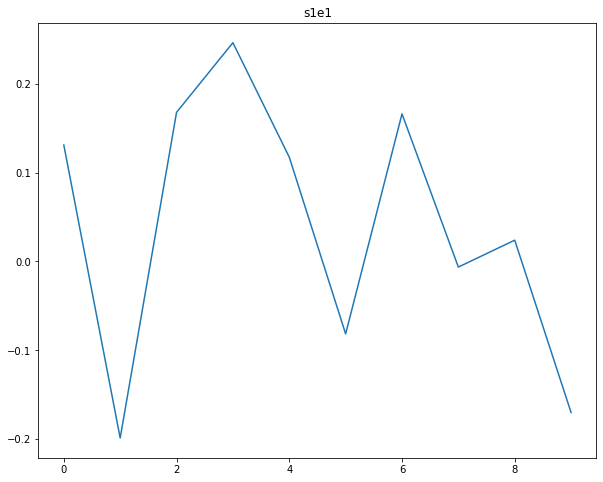

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

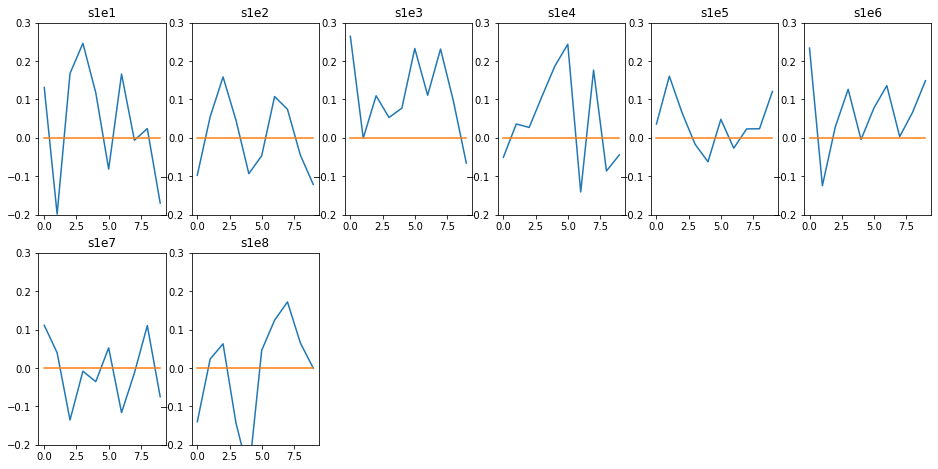

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,10)
    list_pieces.append(split)
    
list_pieces

[['Yo, I am so psychedfor Invisible Force 2.Please.Invisible Force 1 was lame.I\'m all about Rising Tide.Rising Tide? The Deep?- Uh-huh.- Translucent could kick the Deep\'s ass.How? He\'s invisible.That\'s, like, all he\'s got.That\'s it.Exactly.He sneaks up on the Deep,and then boom, motherfucker!- Sit down.- Until the Deep makes a sharkbite Translucent\'s dick off.\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nHow\'s he gonna find his dick?It\'s invisible.Holy shit.Benjy!Get up. Get up, get up, get up.Come on, Benjy.Come on, come on.Stay back.Just stay the fuck back.What are you smiling at?Homelander?You boys okay?Can I... can I get a selfie?Course you can.The Seven\'s Queen Maeveand Homelandermade another heroic save today,\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nstoppinga hijacked armored truckon the streets of Brooklyn,then staying behindfor a photo op- with some very lucky fans.- Nice to meet you.- Jean?- Thanks, Jennifer. And now...So, t

In [ ]:
len(list_pieces)

8

In [ ]:
len(list_pieces[0])

10

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.477219089390142,
  0.47879188712522047,
  0.45480617866981504,
  0.6013174603174604,
  0.4628034547152195,
  0.549077380952381,
  0.5868421052631578,
  0.6629699248120301,
  0.43767636684303346,
  0.6256164021164022],
 [0.5482142857142859,
  0.5662078373015872,
  0.6016053391053391,
  0.5155092592592593,
  0.6374634502923977,
  0.4058779761904763,
  0.4577777777777778,
  0.5229877112135176,
  0.4859027777777778,
  0.531926406926407],
 [0.5273350386986752,
  0.4724587912087912,
  0.425760582010582,
  0.49701107715813597,
  0.39570290820290815,
  0.5065295815295816,
  0.45155844155844155,
  0.5227302789802789,
  0.5339105339105338,
  0.6142714285714287],
 [0.5341269841269842,
  0.44694616977225665,
  0.5616161616161617,
  0.5348861283643892,
  0.48492063492063503,
  0.5982460317460319,
  0.6426697530864197,
  0.5488492063492063,
  0.3981292517006802,
  0.6138277116402119],
 [0.5431843350448002,
  0.5532738095238096,
  0.5813492063492064,
  0.5494815668202765,
  0.5914399092970524,
  

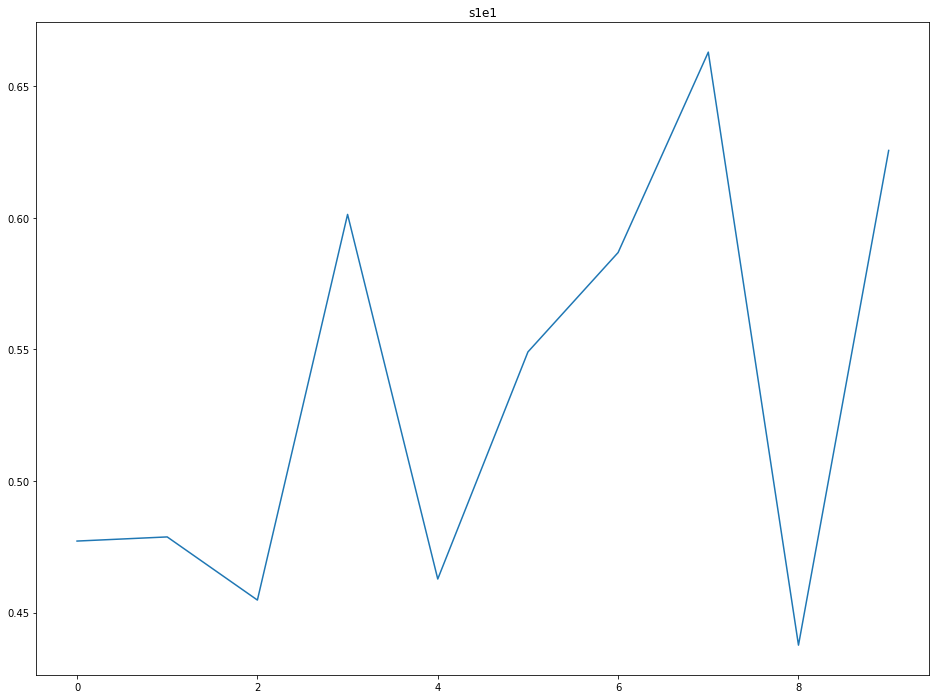

In [ ]:
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

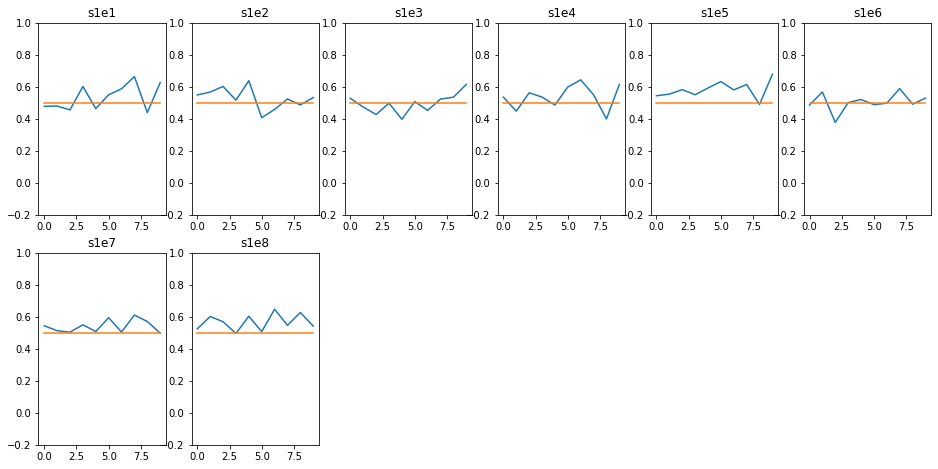

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.full(10,0.5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=1)
    
plt.show()

Here are a few possible categories that we can use for such a classification:

Positive: Comedians who tend to have a generally positive, upbeat tone in their comedy routines, with little to no negativity or sarcasm. This might include comedians who focus on "clean" or family-friendly humor, or who specialize in feel-good comedy.

Neutral: Comedians who have a relatively neutral tone in their comedy routines, with a mix of positive and negative elements. This might include comedians who use a lot of observational humor, or who tell stories that have both funny and serious elements.

Negative: Comedians who tend to have a more negative or cynical tone in their comedy routines, with a lot of sarcasm or biting humor. This might include comedians who specialize in political or social commentary, or who use a lot of profanity or edgy material.

Subjective: Comedians who have a very personal or subjective style of comedy, with a lot of personal anecdotes or opinions. This might include comedians who use a lot of self-deprecating humor, or who share personal stories about their own lives.
  
As now we have decided the categories for classification, we should consider the threshold value of polarity and subjectivity for such type of classification:
As polairy varies between -1 and 1, therefore we will keep 0 as neutral tone and -1 for highly negative and +1 for highly positive.
As subjectivty varies bewteen 0 and 1, therefor we will keep 0.5  for normal behaviour which consist of both opinios and facts as well and 0 for highly fact things and 1 for highly subjective things.


1. Ali Wong- Mostly Positive, Factual and Negative very few of the times
2. Anthony Jeselnik - Very Negative Beginning and highly Subjective
3. Bill Burr- Neutral as the positivity has same amount as that of nagativity
4. Dave Chapelle - Highly Positive and a little Subjective comparatively
5. Eric Andre- Neutral
6. George Carlin - Positive and little Subjective
7. Jim Jefferies- Negative a few of the times and Subjective
8. Joe Rogan- Mostly Positive and later Subjective
9. John Mulaney - Positive and little Objective
10. Kenny Sebestian- Somewhat Negative and highly Subjective
11. Louis C.K- Mostly Positive and little Subjective
12. Mike Bribgilia-Positive and then Objective later
13. Pete Davidson- A little Negative and Subjective
14. Ricky Gervais- Positive and Neutral mostly 
15. Taylor Tomlinson- Positive and Subjective initially
16. Tom Papa- Highly Positive and Subjective
17. Trevor Noah- Most Negative and Subjective comapritively
18. Whitney Cummings - A little Negative and Neutral mostly

In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,40)
    list_pieces.append(split)
    
list_pieces

[["Yo, I am so psychedfor Invisible Force 2.Please.Invisible Force 1 was lame.I'm all about Rising Tide.Rising Tide? The Deep?- Uh-huh.- Translucent could kick the Deep's ass.How? He's invisible.That's, like, all he's got.That's it.Exactly.He sneaks up on the Deep,and then boom, motherfucker!- Sit down.- Until the Deep makes a sharkbite Translucent's dick off.\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nHow's he gonna find his dick?It's invisible.Holy shit.Benjy!Get up. Get up, get up, get up.Come on, Benjy.Come on, come on.Stay back.Just stay the fuck back.What are you smiling at?Homelander?You boys okay?Can I... can I get a selfie?Course you can.The Seven's Queen Maeveand Homelandermade another he",
  "roic save today,\n\n\n\n     (adsbygoogle = window.adsbygoogle || []).push({});\nstoppinga hijacked armored truckon the streets of Brooklyn,then staying behindfor a photo op- with some very lucky fans.- Nice to meet you.- Jean?- Thanks, Jennifer. And now...So, this 

In [ ]:
# The list has 18 elements, one for each transcript
len(list_pieces)

8

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

40

In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.11111111111111112,
  0.20883699633699632,
  0.07727272727272728,
  0.15885416666666666,
  -0.40625,
  -0.0902777777777778,
  -0.23677248677248677,
  -0.23035714285714284,
  -2.7755575615628914e-17,
  -0.06666666666666668,
  0.2672727272727273,
  0.3517857142857143,
  0.578,
  0.3726190476190476,
  0.2569444444444444,
  -0.25611111111111107,
  0.09123376623376624,
  0.27301587301587305,
  -0.03355654761904761,
  0.13333333333333333,
  0.08888888888888886,
  -0.06454081632653062,
  -0.39999999999999997,
  -0.128125,
  0.190625,
  0.25,
  0.23240740740740742,
  2.2204460492503132e-17,
  -0.37113095238095234,
  0.23611111111111113,
  0.11666666666666667,
  0.0744047619047619,
  0.05555555555555556,
  0.03051146384479718,
  -0.14680555555555555,
  0.49642857142857144,
  0.029050671550671554,
  -0.037500000000000006,
  -0.42656249999999996,
  -0.37187499999999996],
 [-0.1142857142857143,
  0.014583333333333337,
  -0.20586734693877556,
  -0.0035714285714285726,
  -0.05238095238095238,
  

In [ ]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.4177777777777778,
  0.4463369963369963,
  0.3772727272727273,
  0.6491319444444444,
  0.6770833333333333,
  0.5555555555555556,
  0.39470899470899473,
  0.43154761904761907,
  0.5875,
  0.32666666666666666,
  0.39090909090909093,
  0.5084821428571429,
  0.72,
  0.6142857142857142,
  0.5439814814814815,
  0.5702777777777778,
  0.42225829725829733,
  0.5746031746031746,
  0.5211309523809524,
  0.2916666666666667,
  0.5611111111111111,
  0.5586734693877551,
  0.5555555555555556,
  0.509375,
  0.3625,
  0.65,
  0.65,
  0.6399999999999999,
  0.6649801587301587,
  0.6416666666666667,
  0.8,
  0.5188492063492064,
  0.38888888888888884,
  0.3903880070546737,
  0.42138888888888887,
  0.5589285714285714,
  0.5600763125763126,
  0.55,
  0.7234375,
  0.6979166666666666],
 [0.5575892857142858,
  0.43124999999999997,
  0.560204081632653,
  0.6839285714285714,
  0.5559523809523809,
  0.6035353535353536,
  0.5333333333333334,
  0.5477380952380952,
  0.7248015873015873,
  0.29444444444444445,
  0.6

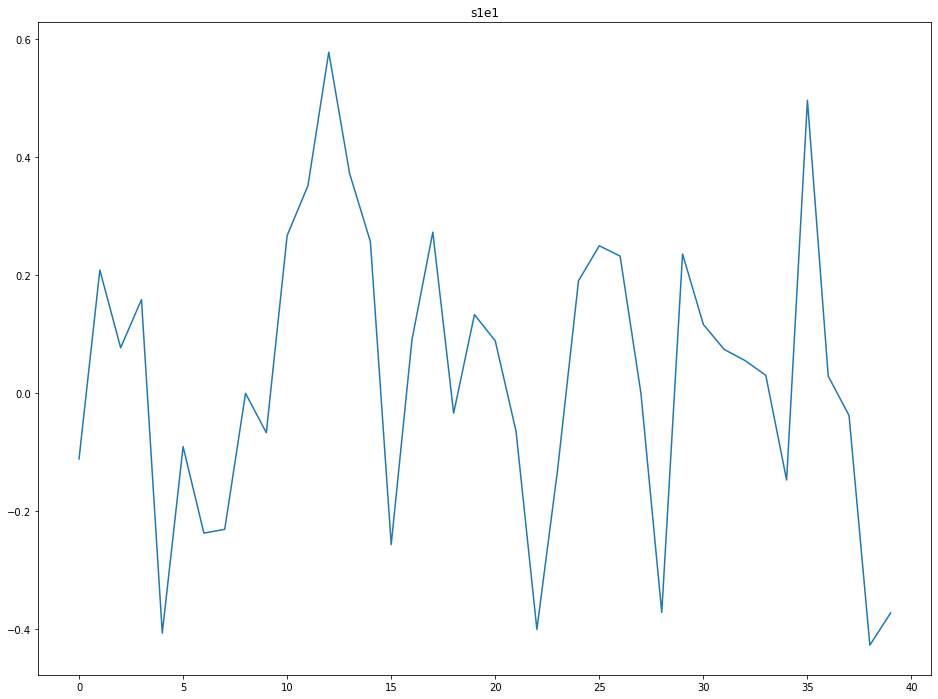

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

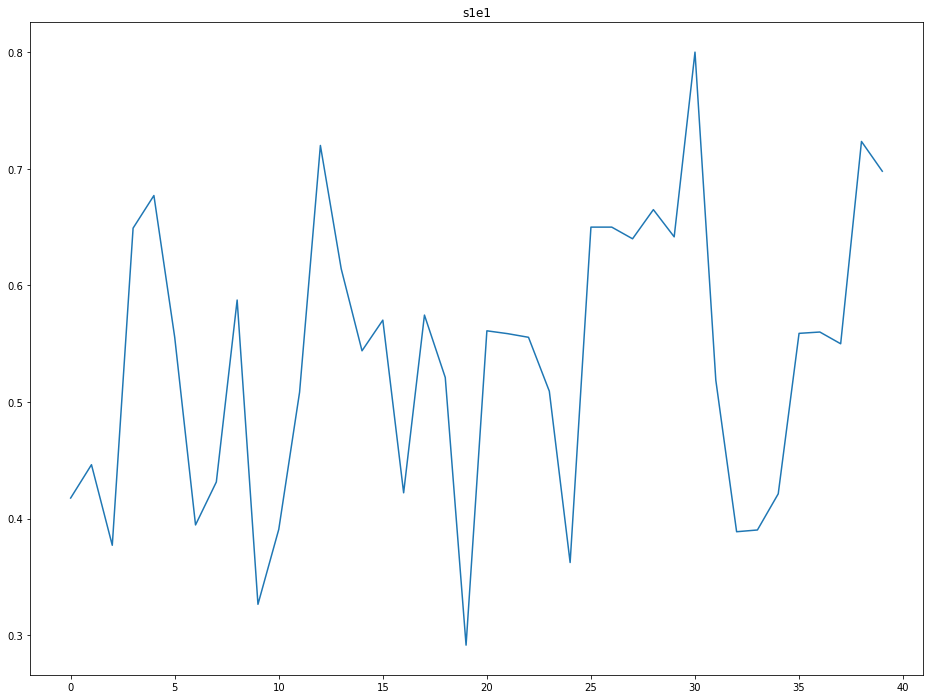

In [ ]:
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

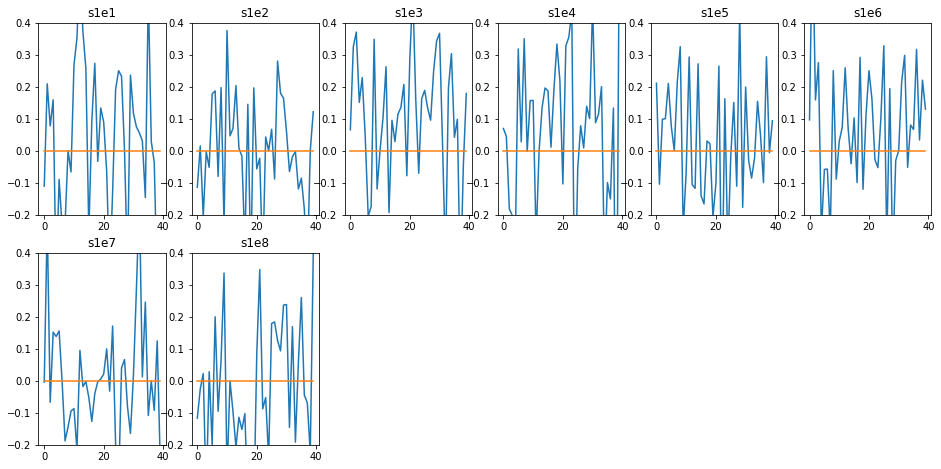

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,40), np.zeros(40))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)
    
plt.show()

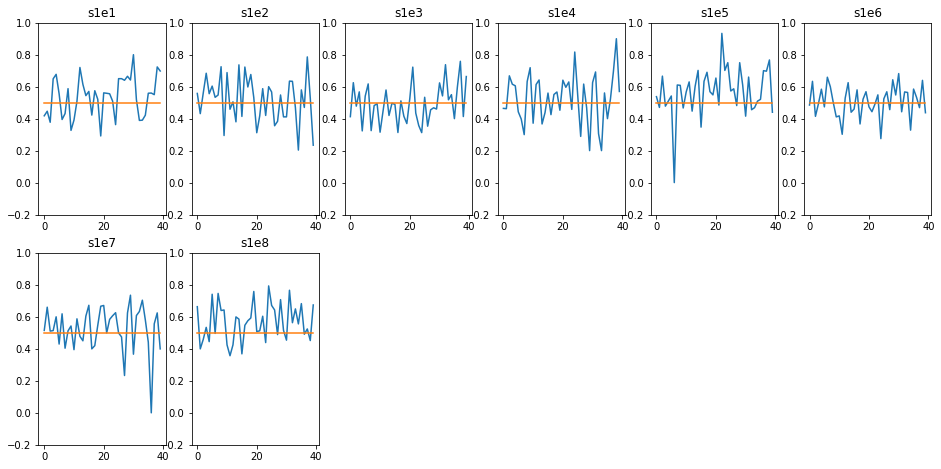

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,40), np.full(40,0.5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=1)
    
plt.show()